In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from pandas.plotting import scatter_matrix
from sklearn.linear_model import LogisticRegression
%matplotlib inline

In [118]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [119]:
df.shape

(891, 12)

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [121]:
df = df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])

In [122]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


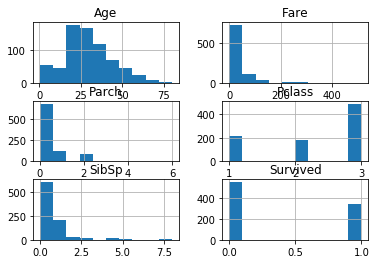

In [123]:
df.hist();

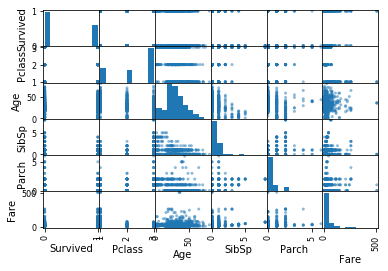

In [124]:
scatter_matrix(df);

In [125]:
Age_median = df.Age.median()
df.Age.fillna(Age_median, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [126]:
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000E08D9E8>,
      dtype=object)

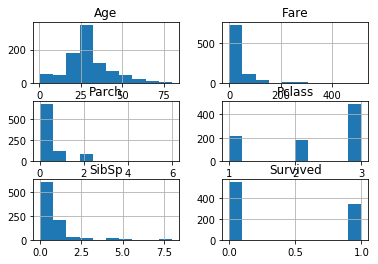

In [127]:
df.hist()


In [128]:
y = df.Survived
X = df.drop(columns = 'Survived')

In [129]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [130]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [131]:
X = pd.get_dummies(X)
X = X.drop(columns=['Sex_male', 'Embarked_S'])
X = sm.add_constant(X)
X.head()

,const,Pclass,Age,SibSp,Parch,Fare,Sex_female,Embarked_C,Embarked_Q
0,1.0,3,22.0,1,0,7.2500,0,0,0
1,1.0,1,38.0,1,0,71.2833,1,1,0
2,1.0,3,26.0,0,0,7.9250,1,0,0
3,1.0,1,35.0,1,0,53.1000,1,0,0
4,1.0,3,35.0,0,0,8.0500,0,0,0


In [132]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=42)

In [133]:
X_train.shape, X_test.shape

((596, 9), (295, 9))

In [134]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [135]:
model.predict(X_test)[:10]

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1], dtype=int64)

In [137]:
X_test[:10]

,const,Pclass,Age,SibSp,Parch,Fare,Sex_female,Embarked_C,Embarked_Q
709,1.0,3,28.0,1,1,15.2458,0,1,0
439,1.0,2,31.0,0,0,10.5000,0,0,0
840,1.0,3,20.0,0,0,7.9250,0,0,0
720,1.0,2,6.0,0,1,33.0000,1,0,0
39,1.0,3,14.0,1,0,11.2417,1,1,0
290,1.0,1,26.0,0,0,78.8500,1,0,0
300,1.0,3,28.0,0,0,7.7500,1,0,1
333,1.0,3,16.0,2,0,18.0000,0,0,0
208,1.0,3,16.0,0,0,7.7500,1,0,1
136,1.0,1,19.0,0,2,26.2833,1,0,0


In [138]:
model.score(X_test, y_test)

0.8135593220338984